In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

In [18]:
# Load the dataset
df = pd.read_csv('df_ape_preprocessed_2.csv')

In [17]:
df = pd.read_csv('df_ape_price.csv')

In [3]:
df.head()

,Unnamed: 0,ETH,score,rank,collection_size,metadata_Earring,metadata_Background,metadata_Fur,metadata_Clothes,metadata_Mouth,metadata_Eyes,metadata_Hat
0,2,80.0,1.013408,0.407011,10000,0.0,1.0,8.0,22.0,1.0,11.0,5.0
1,3,120.0,0.906213,0.774161,10000,0.0,8.0,6.0,0.0,4.0,21.0,18.0
2,5,93.0,0.823711,0.954432,10000,0.0,6.0,3.0,0.0,10.0,16.0,12.0
3,6,38.5,0.863739,0.887031,10000,0.0,6.0,6.0,24.0,4.0,8.0,0.0
4,7,80.0,1.025079,0.374261,10000,0.0,4.0,4.0,40.0,31.0,11.0,0.0


In [ ]:
columns_to_drop = [
    'metadata', 'file_url', 'creator_address', 'updated_date', 
    'attributes', 'strategy', 'collection_size', 'updated_date.1', 'metadata_Earring'
    ,'token_id',	'last_sale_price' , 'rank'
]
df=df.drop(columns_to_drop, axis=1)
df = df.dropna()

In [18]:
columns_to_drop = [
    'Unnamed: 0','rank','collection_size','metadata_Earring'	
]
df=df.drop(columns_to_drop, axis=1)
df = df[(df != 0).all(axis=1)]

In [20]:
ape_X = df.drop('score', axis=1)
ape_y = df['score']

In [19]:
ape_X = df.drop('ETH', axis=1)
ape_y = df['ETH']

In [20]:
# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(ape_X, ape_y, test_size=0.2, random_state=0)


print(X_train[:5], '\n\n', y_train[:5])

         score  metadata_Background  metadata_Fur  metadata_Clothes  \
1694  1.003741                  7.0          12.0              30.0   
522   1.026502                  1.0          18.0              27.0   
1351  1.015495                  8.0           6.0              12.0   
1552  0.915768                  7.0           3.0              24.0   
1612  0.962820                  5.0          13.0              16.0   

      metadata_Mouth  metadata_Eyes  metadata_Hat  
1694            28.0            6.0          22.0  
522             20.0            2.0           9.0  
1351            25.0           23.0          10.0  
1552            10.0            3.0          23.0  
1612             4.0            7.0           6.0   

 1694    90.00
522     75.99
1351     2.00
1552    40.00
1612     0.65
Name: ETH, dtype: float64


In [22]:
columns_to_encode = [
    'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 
    'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat'
]

# Perform one-hot encoding on the specified columns
encoded_X_train = pd.get_dummies(X_train, columns=columns_to_encode)
encoded_X_test = pd.get_dummies(X_test, columns=columns_to_encode)
# Find the columns in X_train_encoded that are not in X_test_encoded
unmatched_columns = [col for col in encoded_X_train.columns if col not in encoded_X_test.columns]

# Drop the unmatched columns from X_train_encoded
encoded_X_train = encoded_X_train.drop(unmatched_columns, axis=1)


In [23]:
# drop low variance columns, setting threshold = 0.02. 

from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.02)
var_thr.fit(encoded_X_train)

# pick low variance columns
concol_train = [column for column in encoded_X_train.columns if column not in encoded_X_train.columns[var_thr.get_support()]]

# drop low variance columns
X_train_variance = encoded_X_train.drop(concol_train,axis=1)
X_train_variance

# print dropped columns
print(concol_train)
print(len(concol_train))

['metadata_Fur_Noise', 'metadata_Fur_Trippy', 'metadata_Clothes_Bandolier', 'metadata_Clothes_Biker Vest', 'metadata_Clothes_Black Holes T', 'metadata_Clothes_Black Suit', 'metadata_Clothes_Blue Dress', 'metadata_Clothes_Guayabera', 'metadata_Clothes_Hip Hop', 'metadata_Clothes_Kings Robe', 'metadata_Clothes_Lab Coat', 'metadata_Clothes_Pimp Coat', 'metadata_Clothes_Prom Dress', 'metadata_Clothes_Rainbow Suspenders', 'metadata_Clothes_Sleeveless Logo T', 'metadata_Clothes_Space Suit', 'metadata_Clothes_Stunt Jacket', 'metadata_Clothes_Tie Dye', 'metadata_Clothes_Tweed Suit', 'metadata_Clothes_Work Vest', 'metadata_Mouth_Bored Bubblegum', 'metadata_Mouth_Bored Party Horn', 'metadata_Mouth_Bored Pipe', 'metadata_Mouth_Bored Pizza', 'metadata_Mouth_Bored Unshaven Cigar', 'metadata_Mouth_Bored Unshaven Pipe', 'metadata_Mouth_Bored Unshaven Pizza', 'metadata_Mouth_Grin Diamond Grill', 'metadata_Mouth_Grin Multicolored', 'metadata_Mouth_Phoneme Oh', 'metadata_Mouth_Phoneme Wah', 'metadata_Mo

In [21]:
# drop low variance columns, setting threshold = 0.02. 
#
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.02)
var_thr.fit(X_train)

# pick low variance columns
concol_train = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]

# drop low variance columns
X_train_variance = X_train.drop(concol_train,axis=1)
X_train_variance

# print dropped columns
print(concol_train)
print(len(concol_train))

['score']
1


In [24]:
# drop low variance columns

concol_test = [column for column in encoded_X_test.columns if column not in X_train_variance.columns]
X_test_variance = encoded_X_test.drop(concol_test,axis=1)
X_test_variance

# print dropped columns
print(concol_test)

['metadata_Fur_Noise', 'metadata_Fur_Trippy', 'metadata_Clothes_Bandolier', 'metadata_Clothes_Biker Vest', 'metadata_Clothes_Black Holes T', 'metadata_Clothes_Black Suit', 'metadata_Clothes_Blue Dress', 'metadata_Clothes_Guayabera', 'metadata_Clothes_Hip Hop', 'metadata_Clothes_Kings Robe', 'metadata_Clothes_Lab Coat', 'metadata_Clothes_Pimp Coat', 'metadata_Clothes_Prom Dress', 'metadata_Clothes_Rainbow Suspenders', 'metadata_Clothes_Sleeveless Logo T', 'metadata_Clothes_Space Suit', 'metadata_Clothes_Stunt Jacket', 'metadata_Clothes_Tie Dye', 'metadata_Clothes_Tweed Suit', 'metadata_Clothes_Work Vest', 'metadata_Mouth_Bored Bubblegum', 'metadata_Mouth_Bored Party Horn', 'metadata_Mouth_Bored Pipe', 'metadata_Mouth_Bored Pizza', 'metadata_Mouth_Bored Unshaven Cigar', 'metadata_Mouth_Bored Unshaven Pipe', 'metadata_Mouth_Bored Unshaven Pizza', 'metadata_Mouth_Grin Diamond Grill', 'metadata_Mouth_Grin Multicolored', 'metadata_Mouth_Phoneme Oh', 'metadata_Mouth_Phoneme Wah', 'metadata_Mo

In [22]:
concol_test = [column for column in X_test.columns if column not in X_train_variance.columns]
X_test_variance = X_test.drop(concol_test,axis=1)
X_test_variance

# print dropped columns
print(concol_test)

['score']


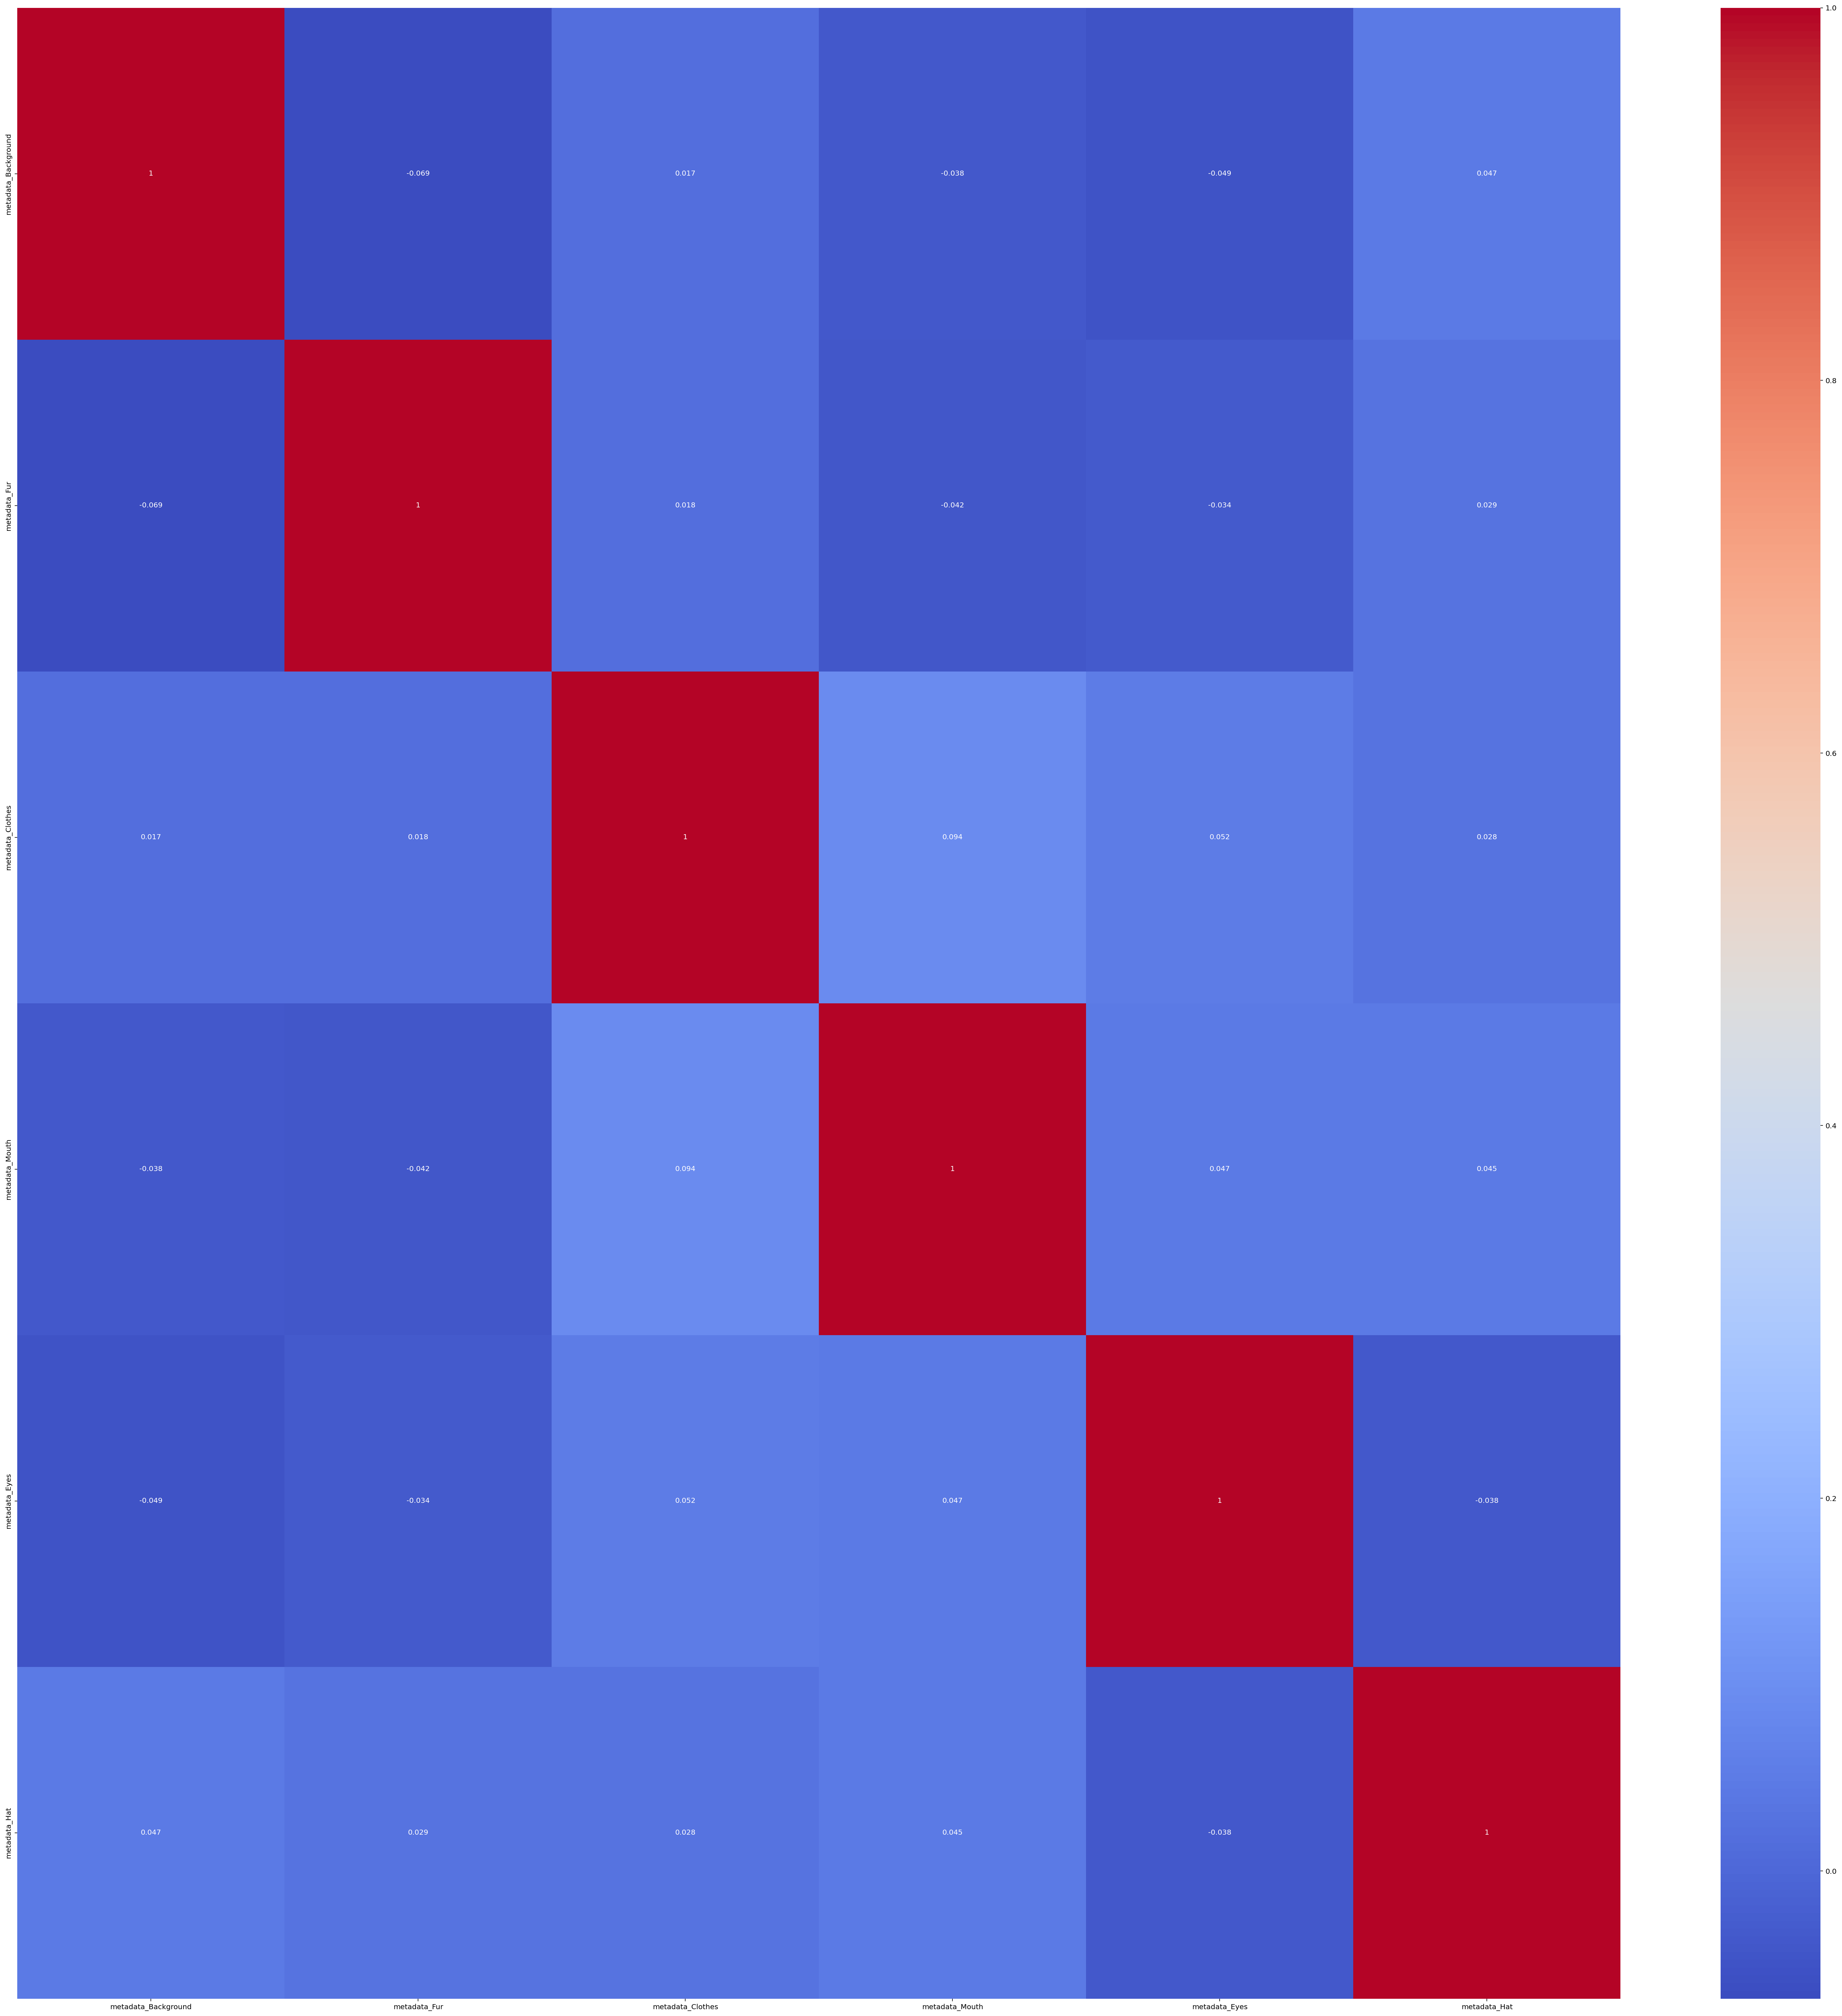

In [23]:
corr_matrix=X_train_variance.corr()
corr_matrix.mask(corr_matrix.abs() < 0.9)
plt.figure(figsize=(50, 50),dpi=144)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# n_components=40 as for now and can be changed
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_reduced = pca.fit_transform(X_train_variance)
X_train_reduced = pd.DataFrame(X_train_reduced)
explained_variance_train = pca.explained_variance_ratio_.sum()
print(explained_variance_train)

1.0


In [25]:
X_test_reduced = pca.transform(X_test_variance)
X_test_reduced = pd.DataFrame(X_test_reduced)
explained_variance_test = pca.explained_variance_ratio_.sum()
print(explained_variance_test)

1.0


In [33]:
#X_train_reduced, X_test_reduced, y_train, y_test
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')
regressor.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = regressor.predict(X_test)
pred_train_xgb = regressor.predict(X_train)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# Calculate the mean squared error
mse = mean_squared_error(y_train, pred_train_xgb)
print(f"Mean Squared Error: {mse}")
# Calculate the R-squared score
r2 = r2_score(y_train, pred_train_xgb)
print(f"R-squared: {r2}")

Mean Squared Error: 3879.4817995114345
R-squared: -0.04232185518655274
Mean Squared Error: 6.2615162559465265
R-squared: 0.9978499714084479


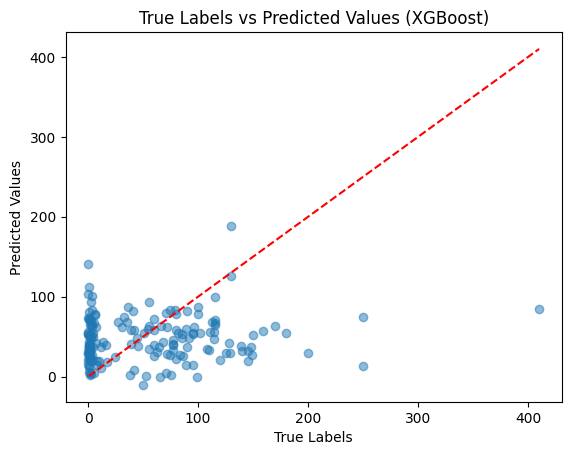

In [32]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values from XGBoost
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values (XGBoost)')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=500,random_state=42)
rf_regressor.fit(X_train_reduced, y_train)
# Make predictions using the trained model
y_pred_rf = rf_regressor.predict(X_test_reduced)
pred_train_rf = rf_regressor.predict(X_train_reduced)
# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (Random Forest): {r2_rf}")
mse_rf_train = mean_squared_error(y_train, pred_train_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf_train}")
# Calculate the R-squared score
r2_rf_train = r2_score(y_train, pred_train_rf)
print(f"R-squared (Random Forest): {r2_rf_train}")

Mean Squared Error (Random Forest): 3894.102243964645
R-squared (Random Forest): -0.04625001094901604
Mean Squared Error (Random Forest): 421.88345052108843
R-squared (Random Forest): 0.8551370875925528


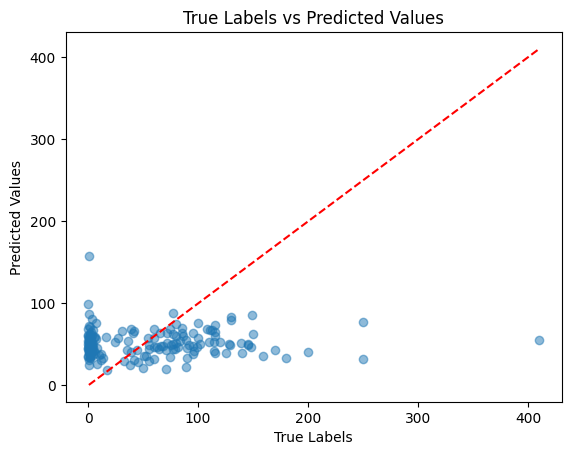

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred_rf))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_reduced, y_train)
y_pred_lr = lr_model.predict(X_test_reduced)
pred_train = lr_model.predict(X_train_reduced)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")


r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (Linear Regression): {r2_lr}")
from sklearn.metrics import mean_squared_error, r2_score
mse_lr_train = mean_squared_error(y_train, pred_train)
print(f"Mean Squared Error on Training Set (Linear Regression): {mse_lr_train}")
r2_lr_train = r2_score(y_train, pred_train)
print(f"R-squared on Training Set (Linear Regression): {r2_lr_train}")


Mean Squared Error (Linear Regression): 3735.6717516943504
R-squared (Linear Regression): -0.0036836133847617525
Mean Squared Error on Training Set (Linear Regression): 2905.3380071179877
R-squared on Training Set (Linear Regression): 0.0023886343033449053


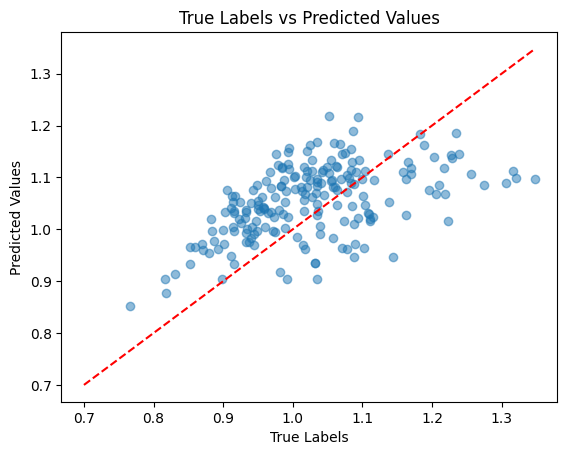

In [44]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred_lr))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()